In [1]:
import sys
import math

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import scipy.stats as stats

from scipy.stats import norm

from multiprocessing import cpu_count
from tqdm import tqdm, tqdm_notebook

from mpengine import mpPandasObj
from util import cprintf

from bet_sizing import getSignal, avgActiveSignals, discreteSignal

# 10.1

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in divide


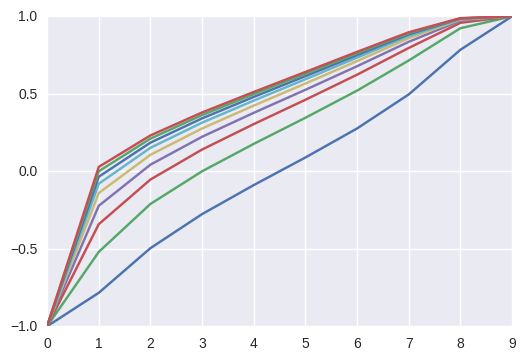

In [8]:
%matplotlib inline

# p = 1 / norm(X)
# z = [p - 1 / norm(X)] / [p(1 - p)]^(1/2)
# m = x(2Z(z) - 1)

def get_m(p, normX):
    z = (p - 1. / normX) / (p*(1 - p))**.5
    m = 2. * norm.cdf(z) - 1.
    
    return m

f,ax = plt.subplots()
p = np.linspace(0., 1., 10)


for x in range(2,11):
    norm_X = x    
    m = get_m(p, norm_X)
    
    s = pd.Series(m)    
    s.plot(ax=ax)



# 10.2

In [6]:
x = np.random.uniform(.5, .1, 10000)
signals = get_m(x, 2)

ind = pd.date_range(start='8/17/1990', end='1/1/2018')
t1 = ind + np.random.randint(1, 25, 10000) * pd.Timedelta(1, unit = 'd')

df = pd.DataFrame({'t1' : t1, 'signals' : signals}, index = ind)
c = avgActiveSignals(df, 4)


2018-09-15 14:03:23.893798 100.0% mpAvgActiveSignals done after 0.11 minutes. Remaining 0.0 minutes.
